### Linear Regression

In [116]:
#Import dataset
import numpy
filename = '/home/shreeya/ml_library/data/housing-class-norm-py.csv'
raw_data = open(filename,'rt')
data = numpy.loadtxt(raw_data,delimiter=",")
print(data.shape)
print(data)

(506, 13)
[[0.00000e+00 1.80000e-01 6.78150e-02 ... 2.87234e-01 8.96800e-02
  4.22222e-01]
 [2.36000e-04 0.00000e+00 2.42302e-01 ... 5.53191e-01 2.04470e-01
  3.68889e-01]
 [2.36000e-04 0.00000e+00 2.42302e-01 ... 5.53191e-01 6.34660e-02
  6.60000e-01]
 ...
 [6.12000e-04 0.00000e+00 4.20455e-01 ... 8.93617e-01 1.07892e-01
  4.20000e-01]
 [1.16100e-03 0.00000e+00 4.20455e-01 ... 8.93617e-01 1.31071e-01
  3.77778e-01]
 [4.62000e-04 0.00000e+00 4.20455e-01 ... 8.93617e-01 1.69702e-01
  1.53333e-01]]


In [117]:
#Split into train & test
#numpy.random.shuffle(data)
trainingData, testData = data[:354,:],data[354:,:]
print('TrainingData = ', trainingData)
print('TrainingData shape = ', trainingData.shape)
print('TestData = ', testData)
print('testData shape = ', testData.shape)

TrainingData =  [[0.00000e+00 1.80000e-01 6.78150e-02 ... 2.87234e-01 8.96800e-02
  4.22222e-01]
 [2.36000e-04 0.00000e+00 2.42302e-01 ... 5.53191e-01 2.04470e-01
  3.68889e-01]
 [2.36000e-04 0.00000e+00 2.42302e-01 ... 5.53191e-01 6.34660e-02
  6.60000e-01]
 ...
 [8.23000e-04 6.00000e-01 4.50880e-02 ... 6.06383e-01 1.03753e-01
  4.24444e-01]
 [7.43000e-04 6.00000e-01 4.50880e-02 ... 6.06383e-01 1.67219e-01
  3.02222e-01]
 [1.21000e-04 9.00000e-01 5.71850e-02 ... 4.68085e-01 7.64350e-02
  5.57778e-01]]
TrainingData shape =  (354, 13)
TestData =  [[4.12000e-04 8.00000e-01 5.31520e-02 ... 1.00000e+00 1.74393e-01
  2.93333e-01]
 [1.12700e-03 8.00000e-01 5.31520e-02 ... 1.00000e+00 1.05960e-01
  3.46667e-01]
 [1.00895e-01 0.00000e+00 6.46628e-01 ... 8.08511e-01 4.37914e-01
  2.84444e-01]
 ...
 [6.12000e-04 0.00000e+00 4.20455e-01 ... 8.93617e-01 1.07892e-01
  4.20000e-01]
 [1.16100e-03 0.00000e+00 4.20455e-01 ... 8.93617e-01 1.31071e-01
  3.77778e-01]
 [4.62000e-04 0.00000e+00 4.20455e-01 

In [118]:
#Dimensions of train & test data
# trainM = number of training instances
# trainN = number of attributes in the training instances including the output variable
# testM =  number of test instances
# testN = number of attributes of the test instances including the output variable.
# This output variable will be the ground truth against which the predicted output will be evaluated

trainM = trainingData.shape[0]
trainN = trainingData.shape[1]
testM = testData.shape[0]
testN = testData.shape[1]
print('TrainData m x n = ', trainM, 'x', trainN)
print('TestData m x n = ', testM, 'x', testN)

TrainData m x n =  354 x 13
TestData m x n =  152 x 13


In [119]:
#Predict function

def predict(theta0, theta1, dataForPred):
    predictY = theta0
    for j in range(trainN-1):
        predictY = predictY + (theta1[j] * dataForPred[j])
    #print(predictY)
    return predictY

In [120]:
def testDataPred():
    testPredict = 0.0
    testError = 0.0
    sqTestError = 0.0
    cumError = 0.0
    testInstance = numpy.zeros((testN-1))
    for testi in range(testM):
        testInstance = testData[testi][0:testN-1]
        #print('TestInstance: ', testInstance)
        testPredict = predict(theta0, theta1, testInstance)
        print('Predicted = ', testPredict, '\t', 'Actual =', testData[testi][testN-1])
        testError = testPredict - testData[testi][testN-1]
        sqTestError = testError**2
        cumError = cumError + sqTestError
    meanError = cumError / testM
    return(math.sqrt(meanError))

In [121]:
#Initialise some parameters of the algorithm & required variables
theta0 = 0.0
theta1 = numpy.zeros((trainN-1))
print(theta1)
updatedTheta0 = 0.0
updatedTheta1 = numpy.zeros((trainN-1))
alpha = 0.3
epochs = 10
cost = 0.0
minCost = 0.0
error = 0.0
RMSEPerEpoch = 0.0
trainingInstance = numpy.zeros((trainN-1))
RmsePerEpochArr = numpy.zeros((epochs))

#Stochastic Gradient Descent
import math

for begin in range(epochs):
    print('\n Epoch = ', begin)
    for i in range(trainM):
        trainingInstance = trainingData[i][0:trainN-1]
        #print(trainingInstance)
        predictedY = predict(theta0, theta1, trainingInstance)
        #print('PredictedY = ', predictedY)
        actualY = trainingData[i][trainN-1]
        #print('ActualY = ', actualY)
        
        #Calculate error using RMSE
        error = predictedY - actualY
        #print('Error =', error)
                
        #update the thetas
        updatedTheta0 = theta0 - alpha * error
        theta0 = updatedTheta0
        
        for j in range(trainN-1):
            updatedTheta1[j] = theta1[j] - alpha * error * trainingInstance[j]
            theta1[j] = updatedTheta1[j]

    #print the theta values
    print('theta values = ', theta0, '\t' ,numpy.transpose(theta1))
    
    #Calculate RMSE per epoch   
    RMSEPerEpoch = testDataPred()
    print("RMSE = ", RMSEPerEpoch)
    RmsePerEpochArr[begin] = RMSEPerEpoch

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

 Epoch =  0
theta values =  0.17936965850153935 	 [-0.00242129  0.04470273 -0.07032958 -0.01113823  0.01368696  0.61665385
 -0.04319929 -0.00282496  0.03662552 -0.12492472  0.01361649 -0.29445017]
Predicted =  0.38166001303325187 	 Actual = 0.293333
Predicted =  0.4351326933813726 	 Actual = 0.346667
Predicted =  0.2087799507293368 	 Actual = 0.284444
Predicted =  0.2684721215046453 	 Actual = 0.371111
Predicted =  0.25463864693528565 	 Actual = 0.393333
Predicted =  0.25535078247402093 	 Actual = 0.391111
Predicted =  0.3258024204522481 	 Actual = 0.444444
Predicted =  0.25513044756452485 	 Actual = 0.331111
Predicted =  0.1803748452384995 	 Actual = 0.351111
Predicted =  0.1884266381454347 	 Actual = 0.262222
Predicted =  0.6174143687674505 	 Actual = 0.375556
Predicted =  -0.005149117812361187 	 Actual = 0.5
Predicted =  0.10303565925341183 	 Actual = 0.375556
Predicted =  -0.02797356572204171 	 Actual = 0.402222
Predicted =  0.1849239053283715

Predicted =  0.48472467974602373 	 Actual = 0.386667
Predicted =  0.4041326805633926 	 Actual = 0.346667
Predicted =  0.5639920766202255 	 Actual = 0.42
Predicted =  0.526668532937925 	 Actual = 0.377778
Predicted =  0.3916339526910608 	 Actual = 0.153333
RMSE =  0.1986708455539614

 Epoch =  3
theta values =  0.13365843583818007 	 [-0.00645022 -0.00364001 -0.06881668 -0.00360427 -0.09090353  0.95430927
 -0.07222896 -0.12826829  0.07517723 -0.22333934  0.0254377  -0.17495242]
Predicted =  0.3238543693362737 	 Actual = 0.293333
Predicted =  0.38752652329851955 	 Actual = 0.346667
Predicted =  0.23073355890260228 	 Actual = 0.284444
Predicted =  0.28576445641565557 	 Actual = 0.371111
Predicted =  0.24841959259693586 	 Actual = 0.393333
Predicted =  0.24765820253072504 	 Actual = 0.391111
Predicted =  0.31840249757861744 	 Actual = 0.444444
Predicted =  0.26096856839445204 	 Actual = 0.331111
Predicted =  0.11617908311348421 	 Actual = 0.351111
Predicted =  0.17936654701570598 	 Actual =

Predicted =  0.20872747601990863 	 Actual = 0.122222
Predicted =  0.32562288536040146 	 Actual = 0.268889
Predicted =  0.295584882272132 	 Actual = 0.297778
Predicted =  0.34191936948717205 	 Actual = 0.231111
Predicted =  0.20805543508760432 	 Actual = 0.128889
Predicted =  0.3271449615137093 	 Actual = 0.151111
Predicted =  0.31838880053758556 	 Actual = 0.22
Predicted =  0.3018655933344168 	 Actual = 0.168889
Predicted =  0.2889157345139466 	 Actual = 0.202222
Predicted =  0.3331425555271895 	 Actual = 0.177778
Predicted =  0.40650761563992593 	 Actual = 0.186667
Predicted =  0.3820110920038143 	 Actual = 0.226667
Predicted =  0.3180016413939501 	 Actual = 0.246667
Predicted =  0.5275009886737432 	 Actual = 0.284444
Predicted =  0.3947342135243519 	 Actual = 0.22
Predicted =  0.3641675018781416 	 Actual = 0.202222
Predicted =  0.25012341884529 	 Actual = 0.171111
Predicted =  0.25100242166989434 	 Actual = 0.188889
Predicted =  0.3219516718897303 	 Actual = 0.22
Predicted =  0.28321

Predicted =  0.38288756951894237 	 Actual = 0.115556
Predicted =  0.541957540574075 	 Actual = 0.12
Predicted =  0.449235346402197 	 Actual = 0.131111
Predicted =  0.2255379707501056 	 Actual = 0.14
Predicted =  0.22215463847998312 	 Actual = 0.162222
Predicted =  -0.015313707061107192 	 Actual = 0.084444
Predicted =  0.16755500178547678 	 Actual = 0.048889
Predicted =  0.03701918664176351 	 Actual = 0.122222
Predicted =  0.11446197447867401 	 Actual = 0.053333
Predicted =  0.08073759322801416 	 Actual = 0.115556
Predicted =  0.19665945939817103 	 Actual = 0.144444
Predicted =  0.2662097226548624 	 Actual = 0.224444
Predicted =  0.34412209645577624 	 Actual = 0.404444
Predicted =  0.1184237568796131 	 Actual = 0.104444
Predicted =  0.37695163542972815 	 Actual = 0.195556
Predicted =  0.30970935470814365 	 Actual = 0.171111
Predicted =  0.42794599149721907 	 Actual = 0.18
Predicted =  0.41560802361797866 	 Actual = 0.166667
Predicted =  0.27607668526970675 	 Actual = 0.077778
Predicted 

[ 1  2  3  4  5  6  7  8  9 10]
[0.18039344 0.19887263 0.19867085 0.19746734 0.19889283 0.20320646
 0.20948211 0.21664276 0.22387032 0.23066553]


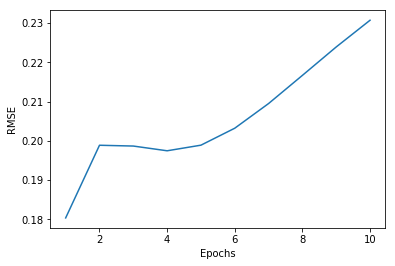

In [122]:
import matplotlib.pyplot as plt
x = numpy.array(range(epochs))
x += 1
y = RmsePerEpochArr
print(x)
print(y)
plt.plot(x,y)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()